In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
import json

from citipy import citipy



from config import api_key



In [38]:
#Generate the DataFrame of Random Cities
num_cities = 50
#{'coord': {'lon': , 'lat': }
latitude = np.random.uniform(-90, 90,num_cities)
longitude = np.random.uniform(-180, 180,num_cities)


#Create Data Frame of Latitude and Longitude 
lat_long_df = pd.DataFrame({
    'Latitude' : latitude,
    'Longitude': longitude
})

cities = []
latitude_NS = []
longitude_WE = []
for city in range(0,num_cities):
    near_city = citipy.nearest_city(latitude[city],longitude[city])
    city_name = near_city.city_name 
    cities.append(city_name)
    
    if latitude[city] < 0:
        latitude_NS.append(str(abs(latitude[city])) +'S')
    else:
        latitude_NS.append(str(abs(latitude[city])) + 'N')
    
    if longitude[city] < 0:
        longitude_WE.append(str(abs(longitude[city])) + 'W')
    else:
        longitude_WE.append(str(longitude[city]) + 'E')
        
        
cities_dict = {
    'City': cities,
    'Random Latitude': latitude,
    'Random Longitude': longitude,
    'Latitude_NS': latitude_NS,
    'Longitude_WE': longitude_WE
    
    
}
cities_df = pd.DataFrame(cities_dict)


cities_df.head(20)  


#lat_long_df['Lat Lon '] = lat_long_df['Latitude'] , lat_long_df['Longitude']
#lat_long_df

,City,Random Latitude,Random Longitude,Latitude_NS,Longitude_WE
0,sentyabrskiy,33.582698,157.929144,33.58269759430836N,157.9291441260495E
1,punta arenas,-85.881585,-112.356007,85.88158459398042S,112.35600744413756W
2,amderma,76.994717,60.600133,76.9947174427158N,60.60013260543491E
3,rudnichnyy,59.411196,52.801582,59.411196044248726N,52.80158177611219E
4,half moon bay,33.397363,-132.114573,33.397363025272995N,132.11457276598415W
5,bonavista,52.292461,-48.148865,52.29246141201881N,48.14886466020707W
6,new norfolk,-87.471185,128.530372,87.47118547720457S,128.53037199236843E
7,avarua,-54.330029,-164.168669,54.33002887734427S,164.16866908449572W
8,nikolskoye,46.471147,169.585689,46.47114729527101N,169.58568872124215E
9,port alfred,-74.759346,47.768413,74.75934602427363S,47.76841260477937E


In [39]:
# Save config information

#api.openweathermap.org/data/2.5/weather?lat={lat}&lon={lon}&appid={API key}
#api.openweathermap.org/data/2.5/weather?q={city name}&appid={API key}
url = "http://api.openweathermap.org/data/2.5/weather?"

units = 'imperial'
cities = cities_df['City']
city = "Cape Town"

# Build query URL
#query_url = url + 'lat=' + latitud + '&lon=' + longitud + "&appid=" + api_key + "&units=metric"

query_url = url + 'q=' + city + '&appid=' + api_key + '&units=metric'

#Series that contains every 
cities_url = url + 'q=' + cities_df['City'] + '&appid=' + api_key + '&units=' + units




cities_df




,City,Random Latitude,Random Longitude,Latitude_NS,Longitude_WE
0,sentyabrskiy,33.582698,157.929144,33.58269759430836N,157.9291441260495E
1,punta arenas,-85.881585,-112.356007,85.88158459398042S,112.35600744413756W
2,amderma,76.994717,60.600133,76.9947174427158N,60.60013260543491E
3,rudnichnyy,59.411196,52.801582,59.411196044248726N,52.80158177611219E
4,half moon bay,33.397363,-132.114573,33.397363025272995N,132.11457276598415W
5,bonavista,52.292461,-48.148865,52.29246141201881N,48.14886466020707W
6,new norfolk,-87.471185,128.530372,87.47118547720457S,128.53037199236843E
7,avarua,-54.330029,-164.168669,54.33002887734427S,164.16866908449572W
8,nikolskoye,46.471147,169.585689,46.47114729527101N,169.58568872124215E
9,port alfred,-74.759346,47.768413,74.75934602427363S,47.76841260477937E


In [4]:
# Get weather data
#weather_response = requests.get(query_url) #requests.models.Response
#weather_json = weather_response.json() #dict
#city_coord = weather_json['coord'] #dict
#city_coord

# Series with all the responses
cities_Response = cities_url.apply(requests.get) #pandas.core.series.Series requests.models.Response
#print(cities_Response)


#cities_Response[5].json()


In [5]:
#Temperature (F) vs. Latitude
#Humidity (%) vs. Latitude
#Cloudiness (%) vs. Latitude
#Wind Speed (mph) vs. Latitude

temp = []
lat = []
lon = []
humidity = []
cloudiness = []
wind = []
city_name = []

for n in range(0,len(cities_Response)):
    response = cities_Response[n].json()
    if response['cod'] == '404':
        temp.append(None)
        lat.append(None)
        lon.append(None)
        humidity.append(None)
        cloudiness.append(None)
        wind.append(None)
        city_name.append(None)
    else:
        temp.append(response['main']['temp'])
        lat.append(response['coord']['lat'])
        lon.append(response['coord']['lon'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        wind.append(response['wind']['speed'])
        city_name.append(response['name'])
        
        

dict = {
    'City' : city_name,
    'Temperature': temp,
    'Latitude': lat,
    'Longitude' : lon,
    'Humidity' : humidity,
    'Cloudiness' : cloudiness,
    'Wind Sped (mph)': wind
}

cities_df = pd.DataFrame(dict)
cities_no_NA = cities_df.dropna(how = 'all')
plot_df = cities_no_NA.drop_duplicates(subset=['City'], ignore_index=True)

#Data Frame with Valid and Unique Cities
plot_df

,City,Temperature,Latitude,Longitude,Humidity,Cloudiness,Wind Sped (mph)
0,Saint Paul Harbor,44.60,57.7900,-152.4072,76.0,90.0,13.80
1,Ushuaia,41.00,-54.8000,-68.3000,81.0,40.0,11.50
2,Petropavlovsk-Kamchatskiy,44.60,53.0452,158.6483,70.0,40.0,11.18
3,Butaritari,82.76,3.0707,172.7902,75.0,82.0,8.72
4,Hilo,72.21,19.7297,-155.0900,57.0,90.0,4.61
...,...,...,...,...,...,...,...
423,Ust-Maya,32.50,60.4167,134.5333,98.0,100.0,4.09
424,Batagay-Alyta,21.96,67.8006,130.4114,67.0,32.0,3.67
425,Guilin,66.20,25.2819,110.2864,88.0,90.0,2.24
426,Diffa,80.69,13.3154,12.6113,20.0,22.0,10.38


In [6]:
#Divide the Data Between Norther and Southern Hemispher
northern = plot_df.loc[plot_df['Latitude']>= 0,:]
southern = plot_df.loc[plot_df['Latitude'] < 0,:]




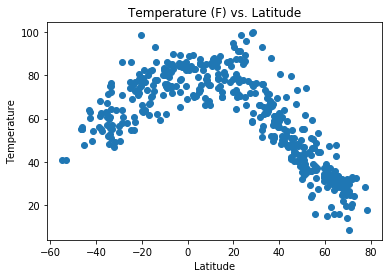

In [7]:
plt.scatter(x = plot_df['Latitude'],y =plot_df['Temperature'] )
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.title('Temperature (F) vs. Latitude')
plt.show()



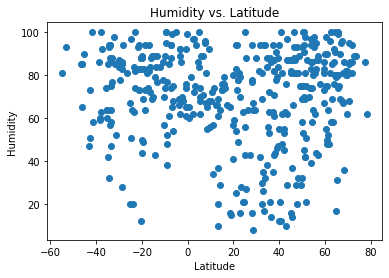

In [8]:
plt.scatter(x = plot_df['Latitude'],y =plot_df['Humidity'] )
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Humidity vs. Latitude')
plt.show()



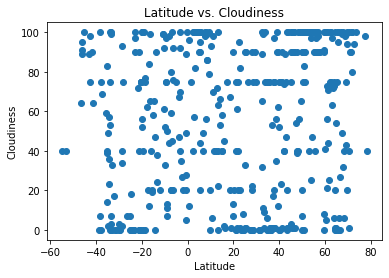

In [9]:
plt.scatter(x = plot_df['Latitude'],y =plot_df['Cloudiness'] )
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Latitude vs. Cloudiness')
plt.show()



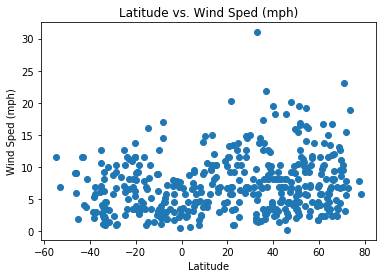

In [10]:
plt.scatter(x = plot_df['Latitude'],y =plot_df['Wind Sped (mph)'] )
plt.xlabel('Latitude')
plt.ylabel('Wind Sped (mph)')
plt.title('Latitude vs. Wind Sped (mph)')
plt.show()


In [11]:
#Save to CSV

file_path = '../VacationPy/Cities.csv'
plot_df.to_csv(file_path, index = False)

print(f'The numer of cities is: {num_cities}')
print(f'There are {num_cities-len(plot_df)} cities')

The numer of cities is: 1000
There are 572 cities
